<a href="https://colab.research.google.com/github/muhammadwajeeharif/Classifying-newswires-a-multiclass-classification-example/blob/main/Classifying_newswires_a_multiclass_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Loading the Reuters dataset


In [5]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
len(train_data)

8982

In [7]:
len(test_data)

2246

In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [9]:
#Decoding newswires back to text

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

557056/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
#Preparing the data
#Encoding the data

In [24]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 
#hame isme onehot encode labels ko bhi krna hga
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels) 


In [18]:
#Building your network

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
#Compiling the model

In [21]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
#Validating your approach
#Setting aside a validation set


In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [27]:
#Training the model

In [28]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 3.1702 - accuracy: 0.3717 - val_loss: 1.7299 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4925 - accuracy: 0.7120 - val_loss: 1.2721 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0544 - accuracy: 0.7857 - val_loss: 1.1149 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8177 - accuracy: 0.8232 - val_loss: 1.0206 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6537 - accuracy: 0.8620 - val_loss: 0.9436 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5159 - accuracy: 0.8906 - val_loss: 0.9310 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4149 - accuracy: 0.9143 - val_loss: 0.8947 - val_accuracy: 0.8110
Epoch 8/20
16

In [29]:
#Plotting the training and validation loss

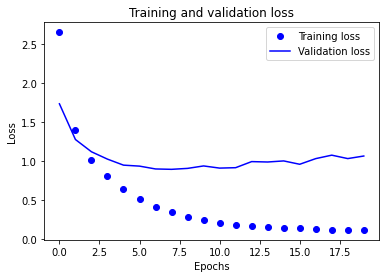

In [31]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(20)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
#Plotting the training and validation accuracy

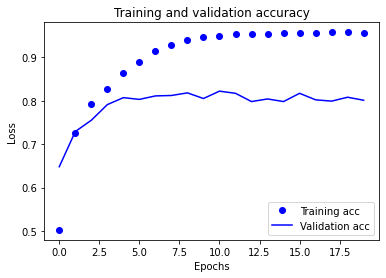

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
#Retraining a model from scratch

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 62ms/step - loss: 3.0259 - accuracy: 0.4412 - val_loss: 1.6714 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.4292 - accuracy: 0.7055 - val_loss: 1.2941 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.0586 - accuracy: 0.7765 - val_loss: 1.1323 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8300 - accuracy: 0.8205 - val_loss: 1.0339 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6616 - accuracy: 0.8583 - val_loss: 0.9965 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5169 - accuracy: 0.8907 - val_loss: 0.9348 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4106 - accuracy: 0.9147 - val_loss: 0.9331 - val_accuracy: 0.7900
Epoch 8/9
16/16 [===

In [38]:
results

[1.0025690793991089, 0.7822796106338501]